In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import table
import matplotlib.ticker as mtick
import seaborn as sns

In [3]:
main_data = pd.read_csv("/Users/kalebbarnes/Downloads/Dat 401 Capstone/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System - Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

In [4]:
main_data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS


In [5]:
#Filter for only the contenintal US
continental_states = [
    "AK", "AL","AZ","AR","CA","CO","CT","DE","DC","FL","GA","ID","IL","IN","IA",
    "KS","KY","LA", "ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ",
    "NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT",
    "VA","WA","WV","WI","WY"
]

main_data = main_data[main_data["LocationAbbr"].isin(continental_states)]

In [6]:
# Check that our filter worked properly
main_data["LocationAbbr"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [7]:
#Clean Data making sure values are numeric and drop any NA values
main_data["Data_Value"] = pd.to_numeric( main_data["Data_Value"] , errors = "coerce" )
main_data["Sample_Size"] = pd.to_numeric( main_data["Sample_Size"] , errors = "coerce" )
main_data = main_data.dropna( subset = ["Data_Value"] )

In [8]:
#Fix naming convention of other to race other
main_data["Stratification1"] = main_data["Stratification1"].replace({"Other": "Race Other"})
main_data["Stratification1"] = main_data["Stratification1"].replace({"Less than $15,000": "$0 - $14,999"})

#Check that this worked
main_data["Stratification1"].unique()

array(['$15,000 - $24,999', '$25,000 - $34,999', '$35,000 - $49,999',
       '$50,000 - $74,999', '$75,000 or greater', '18 - 24',
       '2 or more races', '25 - 34', '35 - 44', '45 - 54', '55 - 64',
       '65 or older', 'American Indian/Alaska Native', 'College graduate',
       'Data not reported', 'Female', 'High school graduate', 'Hispanic',
       '$0 - $14,999', 'Less than high school', 'Male',
       'Non-Hispanic Black', 'Non-Hispanic White',
       'Some college or technical school', 'Total', 'Race Other', 'Asian',
       'Hawaiian/Pacific Islander'], dtype=object)

In [9]:
#Loop through stratifications and print
for strat in main_data["Stratification1"].unique():
    print(strat)

$15,000 - $24,999
$25,000 - $34,999
$35,000 - $49,999
$50,000 - $74,999
$75,000 or greater
18 - 24
2 or more races
25 - 34
35 - 44
45 - 54
55 - 64
65 or older
American Indian/Alaska Native
College graduate
Data not reported
Female
High school graduate
Hispanic
$0 - $14,999
Less than high school
Male
Non-Hispanic Black
Non-Hispanic White
Some college or technical school
Total
Race Other
Asian
Hawaiian/Pacific Islander


In [10]:
#What are the questionID values
#Print ID Values
print(main_data["QuestionID"].unique())

#Create Dict with ID and questions
questions_with_ID = dict(zip(main_data["QuestionID"], main_data["Question"]))

#Loop through dict to print a key for ID's
for id, question in questions_with_ID.items():
    print(f"Question ID: {id}, Question: {question}")

['Q036' 'Q037' 'Q043' 'Q044' 'Q045' 'Q046' 'Q047' 'Q018' 'Q019']
Question ID: Q036, Question: Percent of adults aged 18 years and older who have obesity
Question ID: Q037, Question: Percent of adults aged 18 years and older who have an overweight classification
Question ID: Q043, Question: Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
Question ID: Q044, Question: Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week
Question ID: Q045, Question: Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
Question I

In [11]:
# Group data by stratificationID and then take average of sample size for the groups
# Check if this worked properly
average_sample_size_by_strat = main_data.groupby(["Stratification1", "StratificationCategory1"]).mean("Sample_Size")
average_sample_size_by_strat = average_sample_size_by_strat.sort_values(by=["StratificationCategory1", "Stratification1"])
average_sample_size_by_strat = average_sample_size_by_strat.reset_index()
average_sample_size_by_strat = average_sample_size_by_strat[average_sample_size_by_strat["Stratification1"] != "Total"]
average_sample_size_by_strat

,Stratification1,StratificationCategory1,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
0,18 - 24,Age (years),2016.905903,2016.905903,NaN,28.723729,28.723729,23.586558,34.569725,445.961426,29.243425
1,25 - 34,Age (years),2016.905903,2016.905903,NaN,30.486704,30.486704,26.368381,34.978930,813.754237,29.243425
2,35 - 44,Age (years),2016.905903,2016.905903,NaN,31.609059,31.609059,27.705640,35.819842,983.175336,29.243425
3,45 - 54,Age (years),2016.905903,2016.905903,NaN,32.596727,32.596727,29.063442,36.358504,1284.573641,29.243425
4,55 - 64,Age (years),2016.905903,2016.905903,NaN,33.059585,33.059585,29.904267,36.388311,1705.856224,29.243425
5,65 or older,Age (years),2016.905903,2016.905903,NaN,33.149094,33.149094,30.639392,35.765634,2844.094389,29.243425
6,College graduate,Education,2016.905903,2016.905903,NaN,30.599182,30.599182,28.334366,32.973349,3071.218586,29.243425
7,High school graduate,Education,2016.905903,2016.905903,NaN,32.385506,32.385506,29.469813,35.458182,2191.944185,29.243425
8,Less than high school,Education,2016.905903,2016.905903,NaN,32.761601,32.761601,27.154763,39.000263,575.553770,29.243425
9,Some college or technical school,Education,2016.905903,2016.905903,NaN,31.972385,31.972385,29.156663,34.938515,2219.826417,29.243425


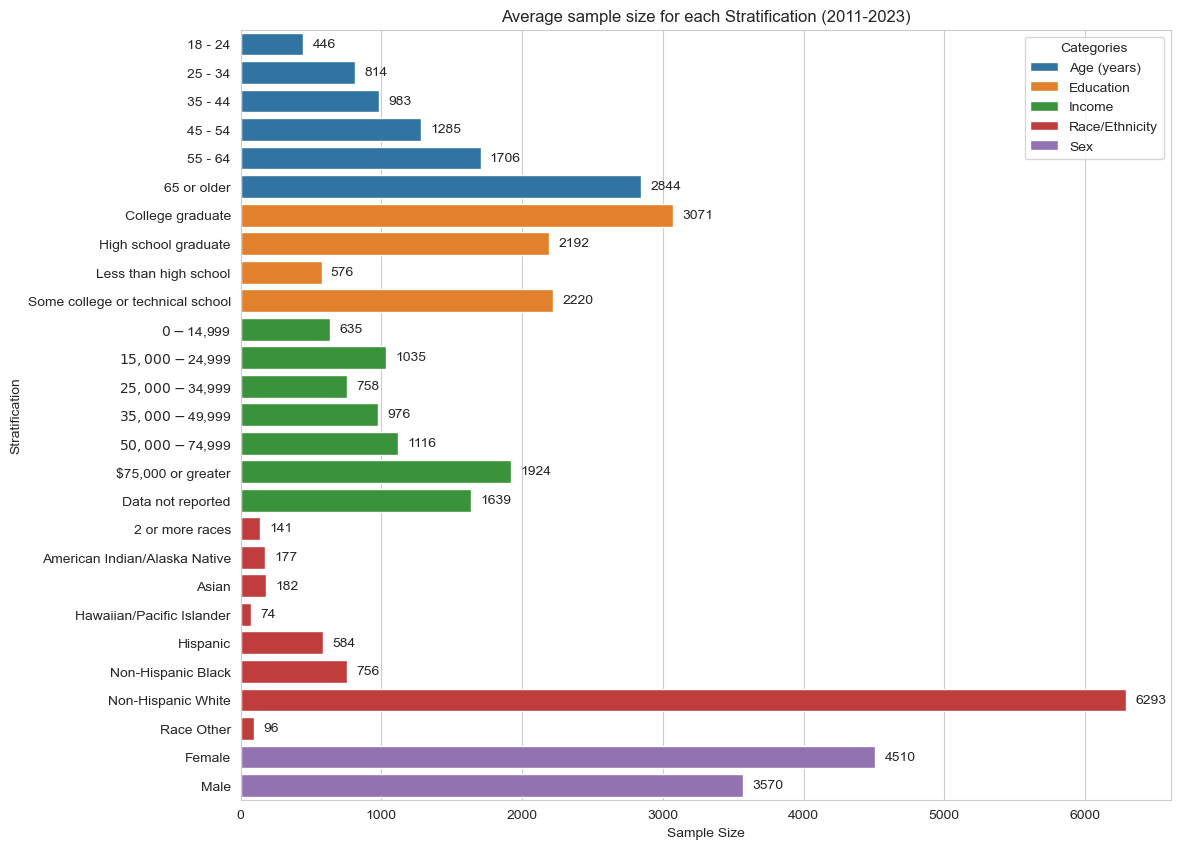

In [12]:
# Plot the averages in a bar graph
plt.figure(figsize = (12,10))
barplot_avg_sample_size = sns.barplot(data=average_sample_size_by_strat,
            x="Sample_Size",
            y="Stratification1",
            hue="StratificationCategory1",
            )

#Values of each bar, add the labels
max_x = barplot_avg_sample_size.get_xlim()[1]
offset = 0.01 * max_x  # 1% of axis range

for patch in barplot_avg_sample_size.patches:
    value = patch.get_width()
    if (value is None) or np.isnan(value) or value <= 0:
        continue  # skip zero/NaN placeholder bars
    y = patch.get_y() + patch.get_height()/2
    barplot_avg_sample_size.text(value + offset, y, f"{value:.0f}", ha="left", va="center")

#Plot details and asthetics
plt.title("Average sample size for each Stratification (2011-2023)")
plt.ylabel("Stratification")
plt.xlabel("Sample Size")
plt.legend(title="Categories")
plt.show()

In [13]:
# Group data by questions
data_grouped_by_questions = main_data.groupby("QuestionID")
data_grouped_by_questions.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS
1540,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q037,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
1541,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q037,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
1542,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q037,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
1543,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q037,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
1544,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q037,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS


In [14]:
#What does the mean data value look like for each question
#Having to convert back to dataframe to avoid plotting errors
avg_data_value_by_questions = data_grouped_by_questions["Data_Value"].mean()
avg_data_value_by_questions = avg_data_value_by_questions.to_frame()
avg_data_value_by_questions.head()

,Data_Value
QuestionID,
Q018,39.486878
Q019,20.645869
Q036,31.109221
Q037,34.390316
Q043,51.257732


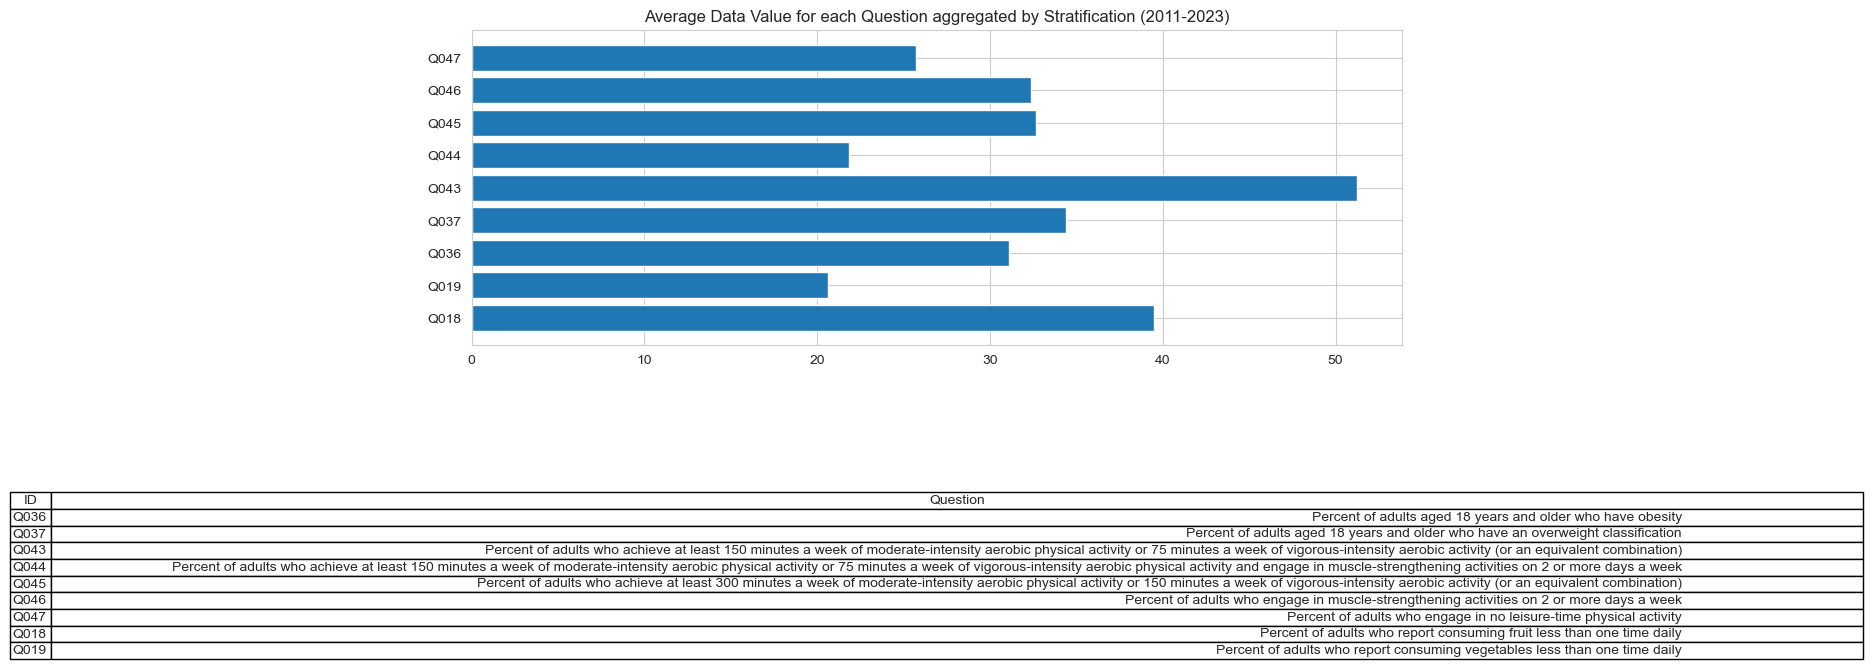

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[3, 1]}, figsize=(12,6))

# Bar chart showing these average values
ax1.barh(avg_data_value_by_questions.index, avg_data_value_by_questions["Data_Value"])
ax1.set_title("Average Data Value for each Question aggregated by Stratification (2011-2023)")

#Create a key for the Question IDs
text = [[id, question] for id, question in questions_with_ID.items()]
table = ax2.table(cellText=text, loc='bottom', colLabels=["ID", "Question"], colLoc='center')

#Adjsut the size of font to make readable and desgin
ax2.set_axis_off()
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0,1])

In [16]:
#Create a bar chart showing the sample sizes for each question
total_rows = main_data[main_data["Stratification1"] == "Total"]
total_rows_by_questions = total_rows.groupby("QuestionID")
avg_total_sample_size_by_questions = total_rows_by_questions["Sample_Size"].mean()
avg_total_sample_size_by_questions = avg_total_sample_size_by_questions.to_frame()
avg_total_sample_size_by_questions.head()

,Sample_Size
QuestionID,
Q018,7618.601351
Q019,7436.858108
Q036,8092.848297
Q037,8092.586687
Q043,7917.249158


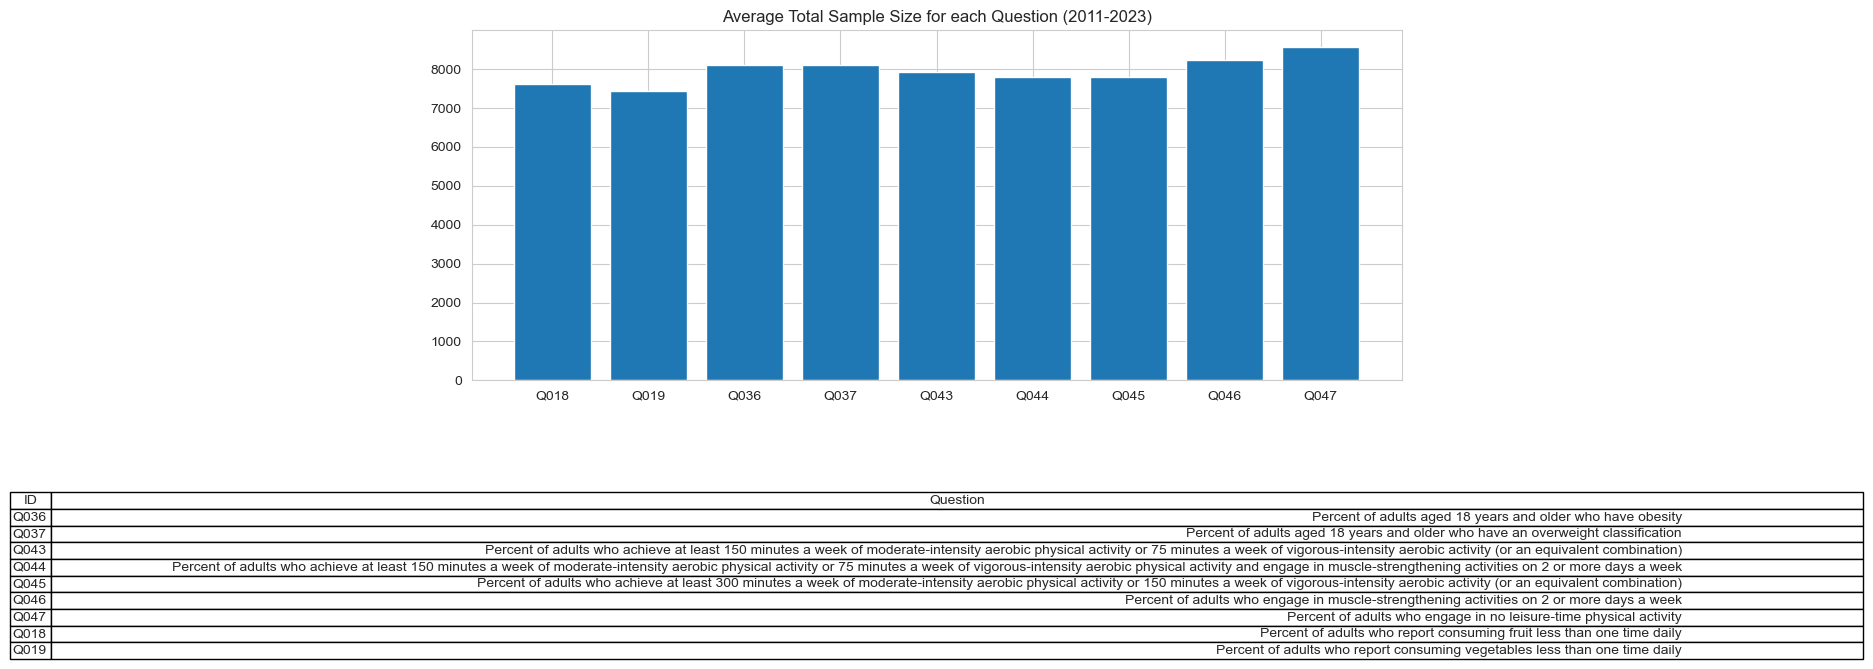

In [17]:
fig2, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[5, 1]}, figsize=(12,6))

# Bar chart showing these average values
ax1.bar(avg_total_sample_size_by_questions.index, avg_total_sample_size_by_questions["Sample_Size"])
ax1.set_title("Average Total Sample Size for each Question (2011-2023)")

#Create a key for the Question IDs
text = [[id, question] for id, question in questions_with_ID.items()]
table = ax2.table(cellText=text, loc='bottom', colLabels=["ID", "Question"], colLoc='center')

#Adjust the size of font to make readable and desgin
ax2.set_axis_off()
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0,1])

In [18]:
#group by question and stratification
grouped_by_questions_and_strat = main_data.groupby(["QuestionID", "Stratification1", "StratificationCategory1"]).mean("Data_Value")

#Sort the dataframe and reset the indexes
grouped_by_questions_and_strat = grouped_by_questions_and_strat.reset_index()
grouped_by_questions_and_strat = grouped_by_questions_and_strat.sort_values(by=["StratificationCategory1", "Stratification1"])

#

#Check that our data looks how we want it to
grouped_by_questions_and_strat

,QuestionID,Stratification1,StratificationCategory1,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
6,Q018,18 - 24,Age (years),2018.986486,2018.986486,NaN,43.356081,43.356081,37.142568,49.800676,442.621622,29.324324
34,Q019,18 - 24,Age (years),2018.986486,2018.986486,NaN,25.900000,25.900000,20.651351,32.025000,431.168919,29.324324
62,Q036,18 - 24,Age (years),2016.972136,2016.972136,NaN,18.257895,18.257895,13.960217,23.596285,448.773994,29.252322
90,Q037,18 - 24,Age (years),2016.972136,2016.972136,NaN,25.869195,25.869195,20.782972,31.740867,448.729102,29.252322
118,Q043,18 - 24,Age (years),2016.279461,2016.279461,NaN,54.930303,54.930303,48.428283,61.256902,428.255892,29.208754
...,...,...,...,...,...,...,...,...,...,...,...,...
139,Q043,Total,Total,2016.279461,2016.279461,NaN,52.530640,52.530640,50.784512,54.263973,7917.249158,29.208754
167,Q044,Total,Total,2016.279461,2016.279461,NaN,22.124579,22.124579,20.684175,23.635354,7805.973064,29.208754
195,Q045,Total,Total,2016.279461,2016.279461,NaN,33.495960,33.495960,31.877778,35.158586,7803.784512,29.208754
223,Q046,Total,Total,2016.279461,2016.279461,NaN,32.239057,32.239057,30.641077,33.884175,8244.471380,29.208754


In [19]:
#Check we have properly moved the index
grouped_by_questions_and_strat.index.unique()

Index([  6,  34,  62,  90, 118, 146, 174, 202, 230,   8,
       ...
       246,  27,  55,  83, 111, 139, 167, 195, 223, 251],
      dtype='int64', length=252)

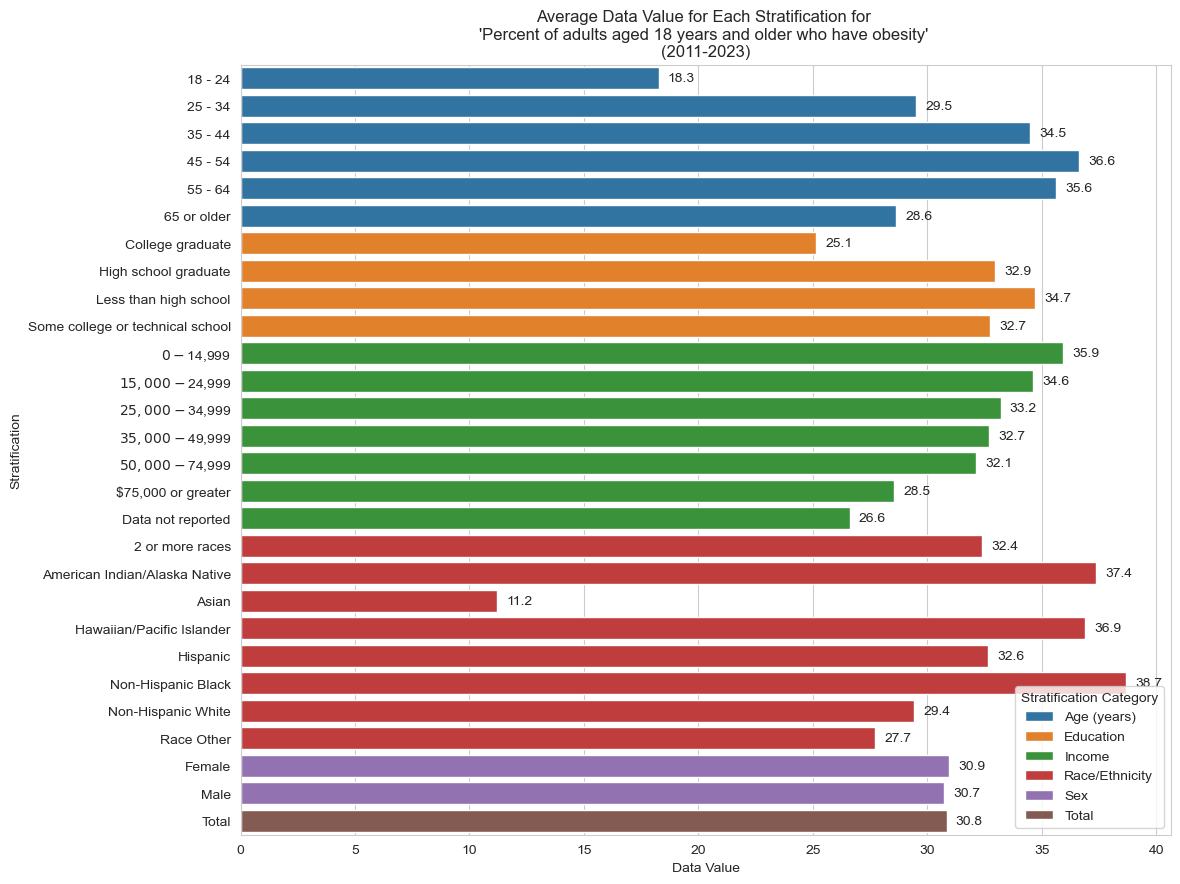

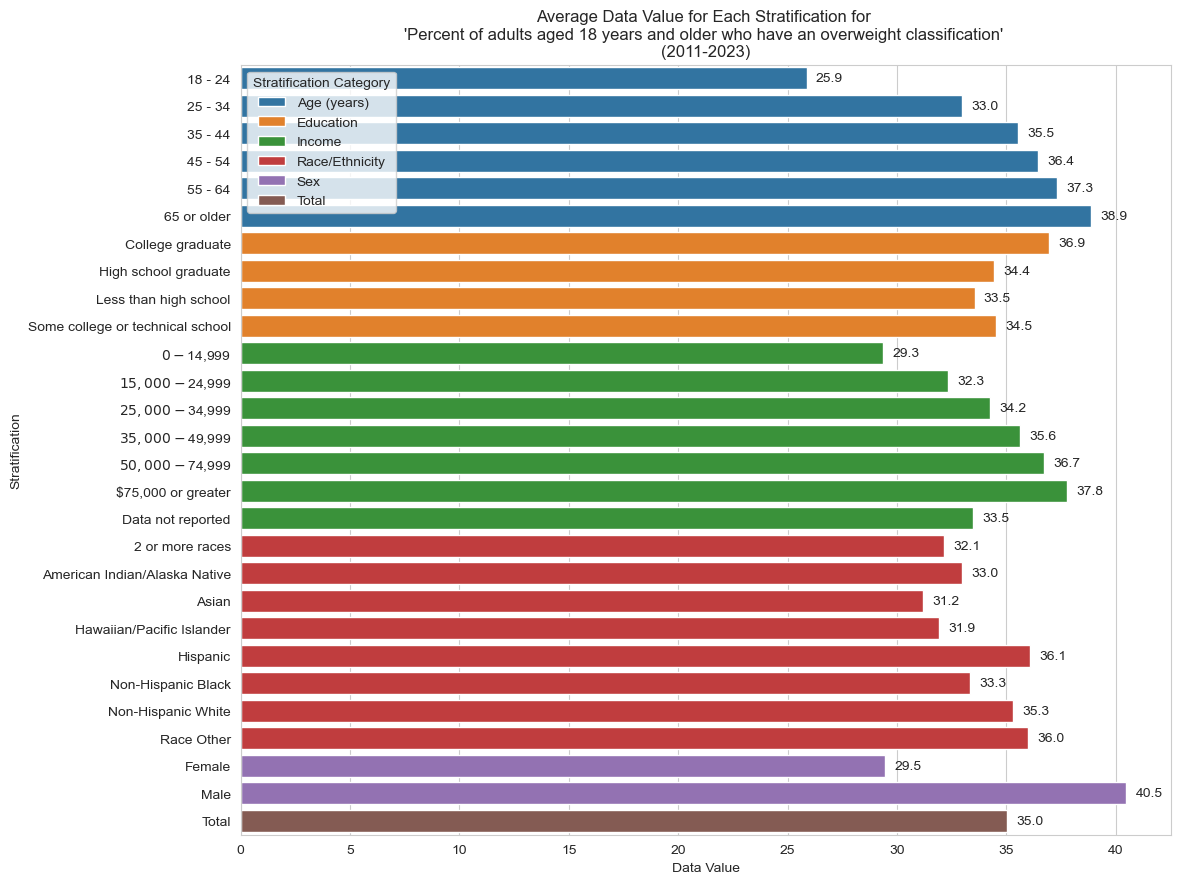

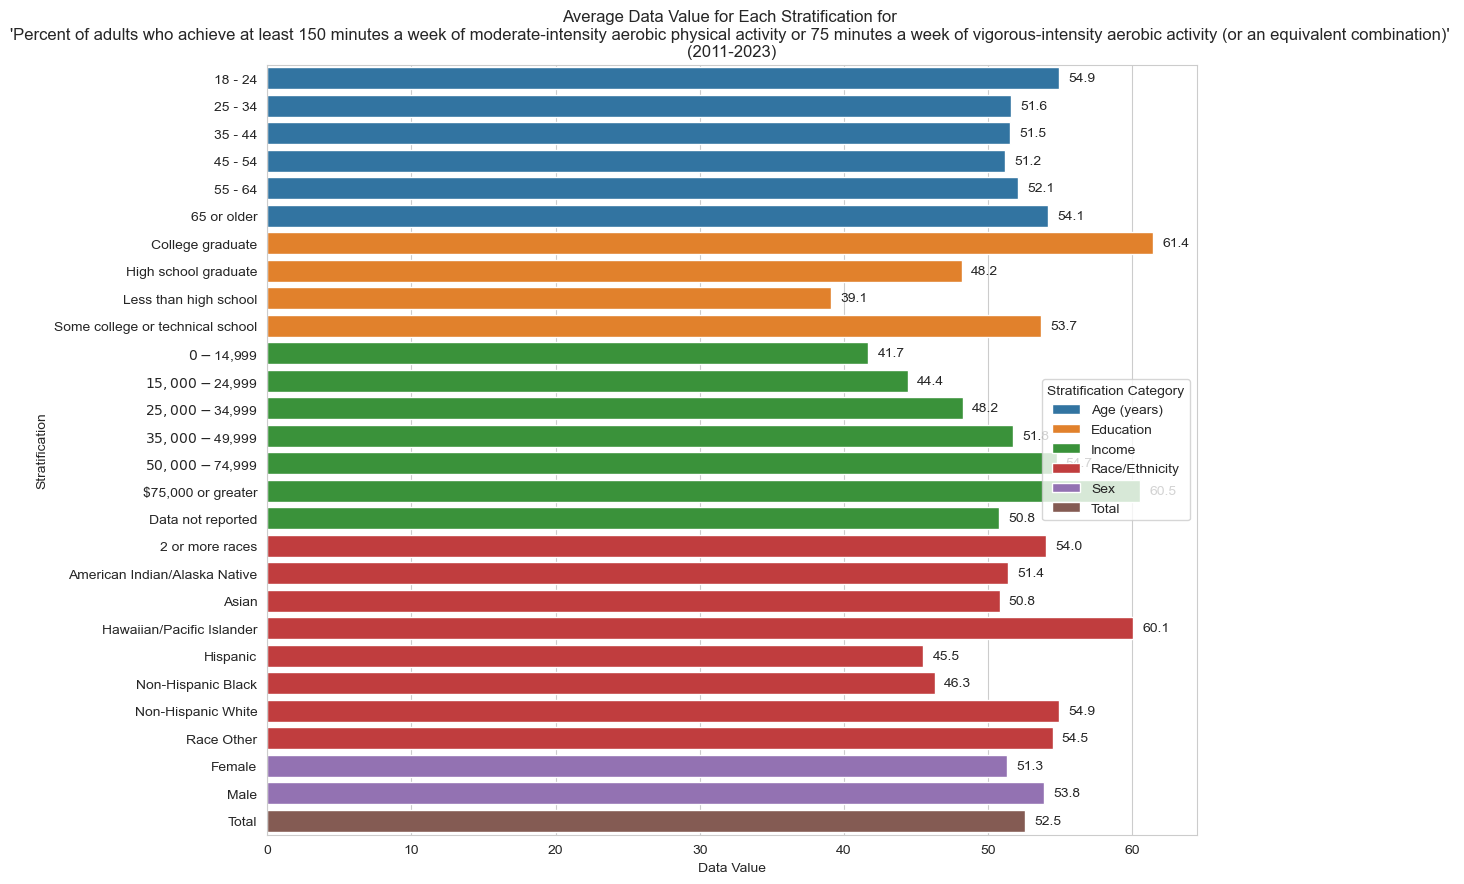

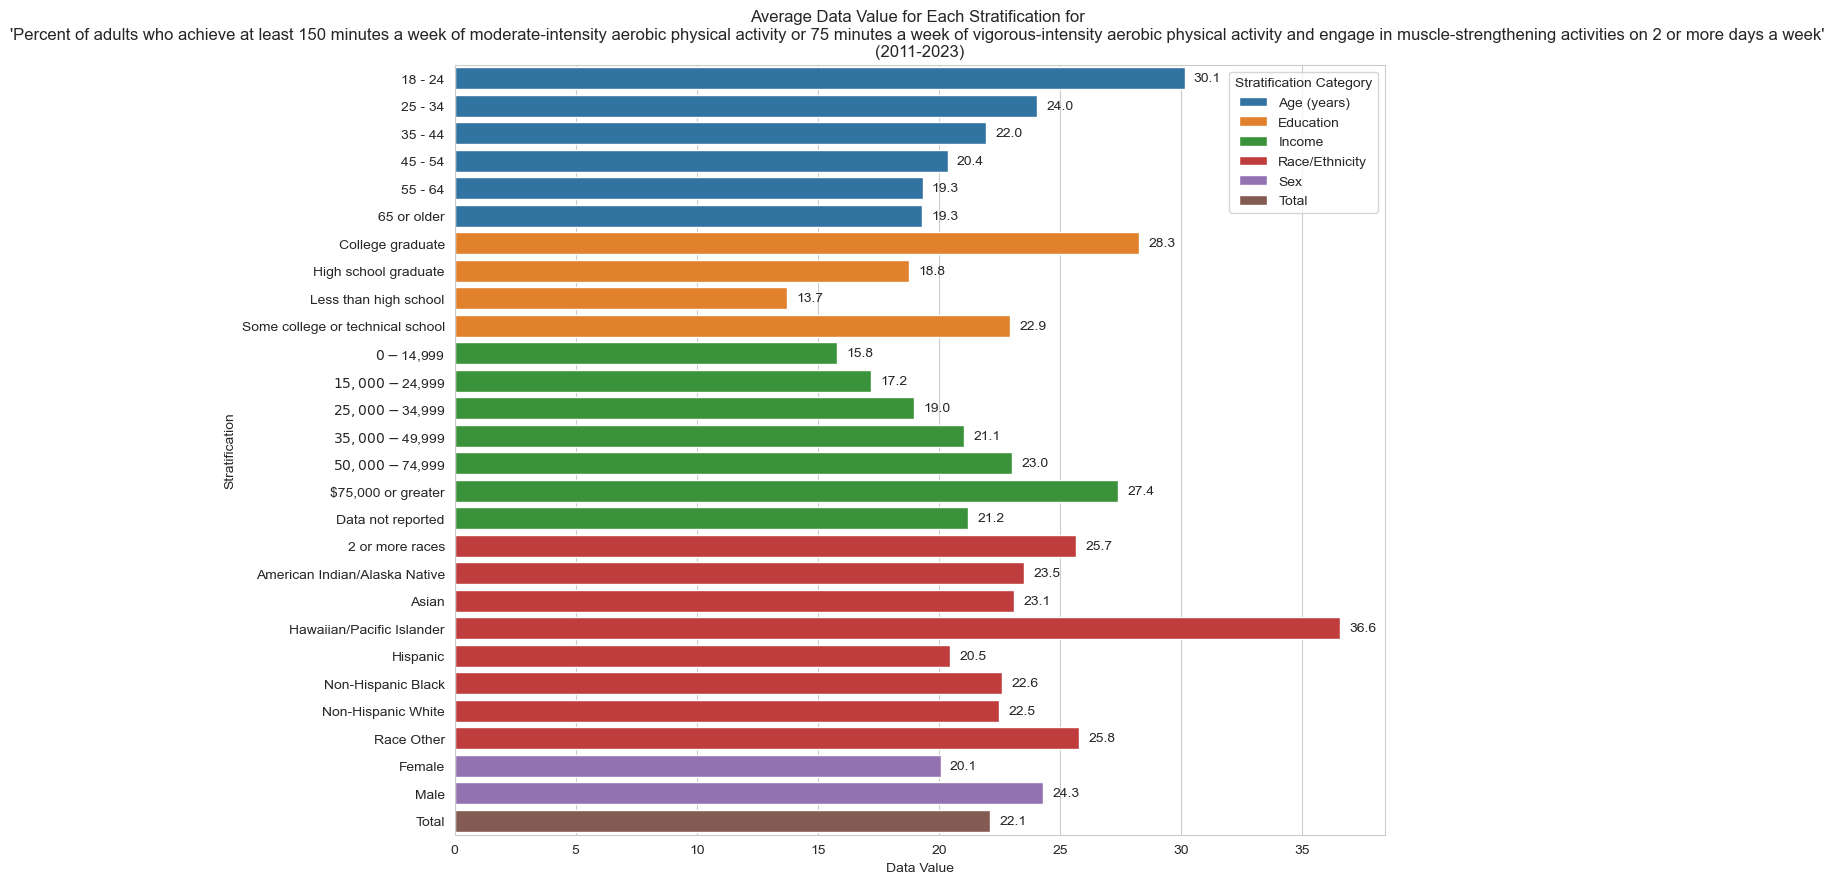

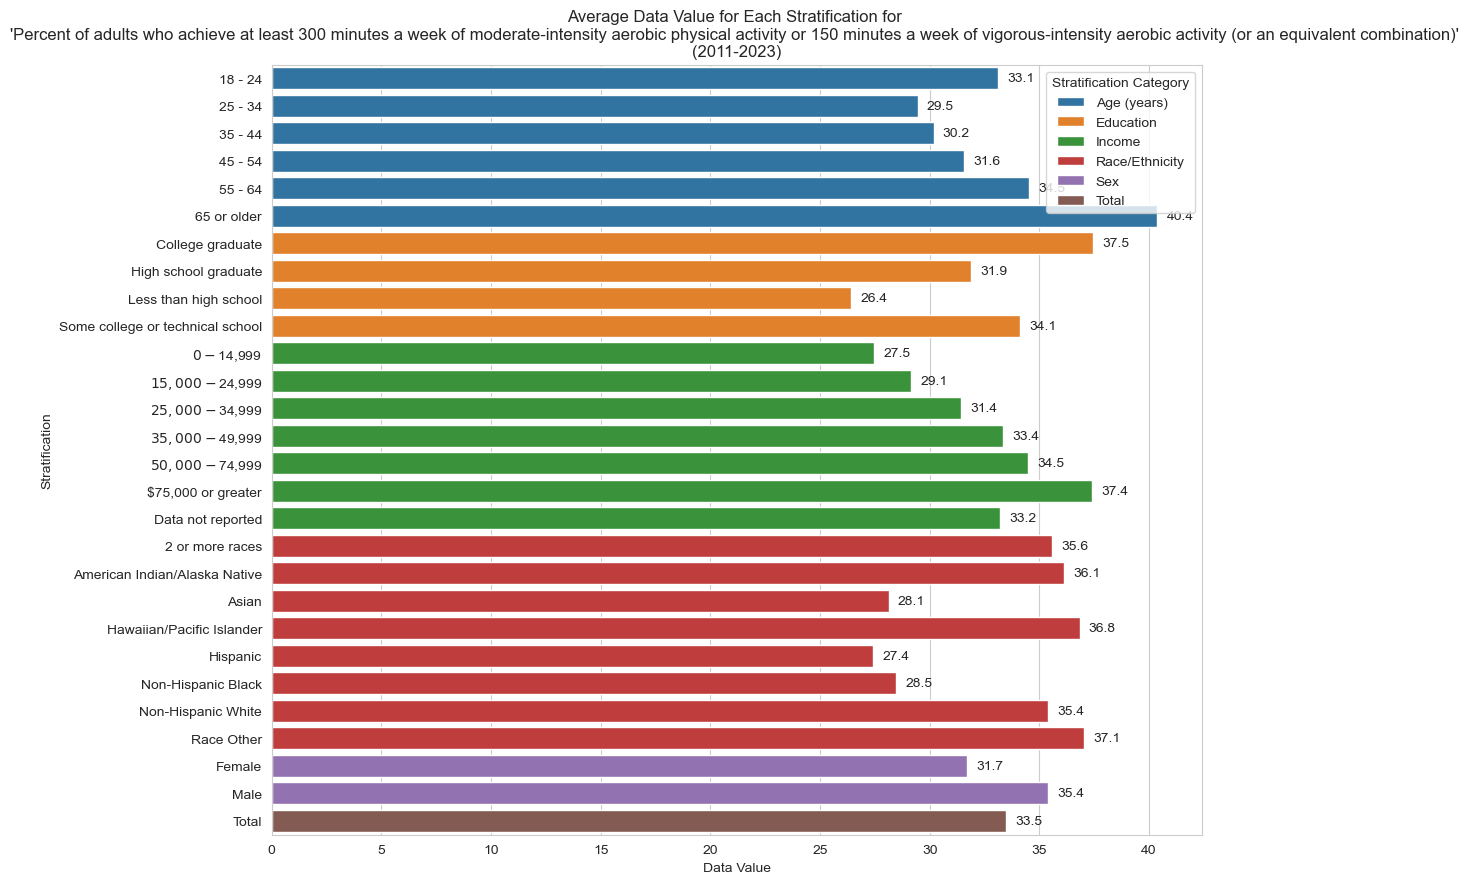

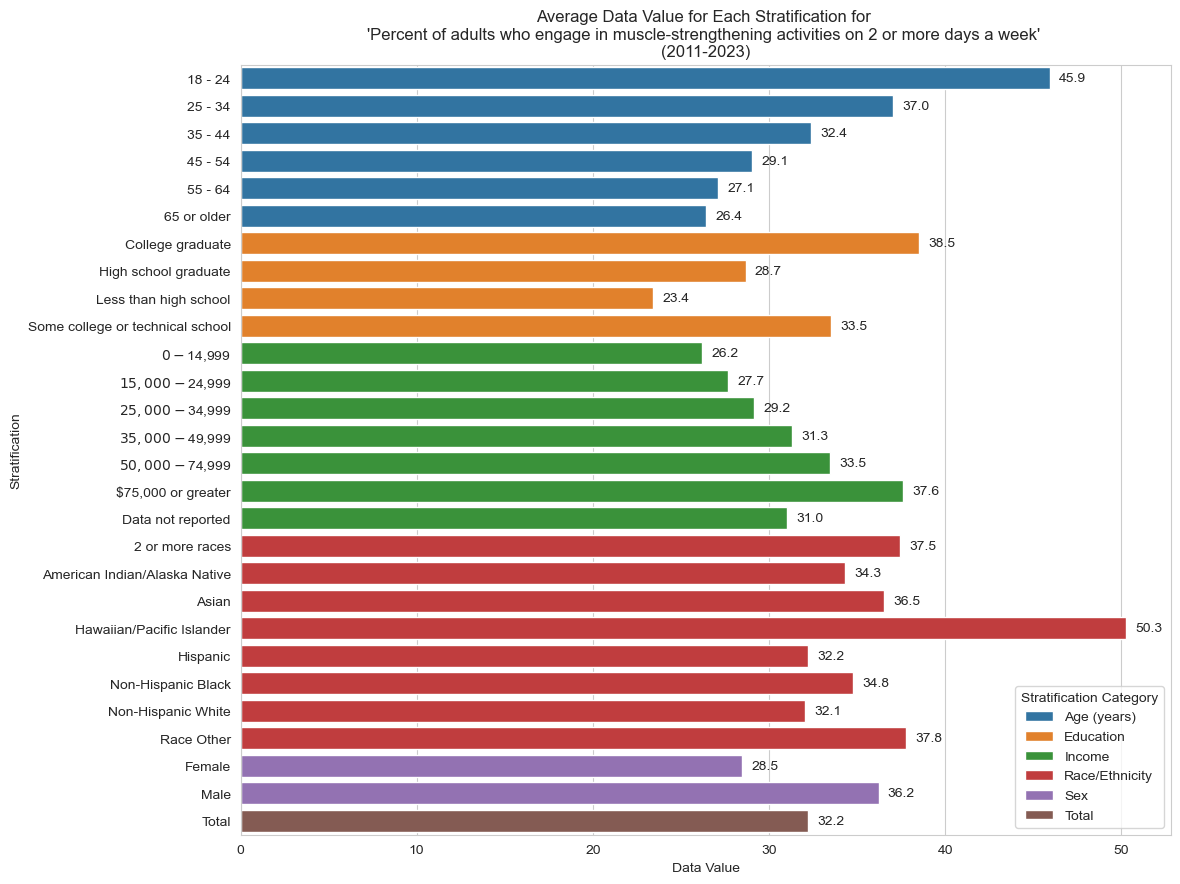

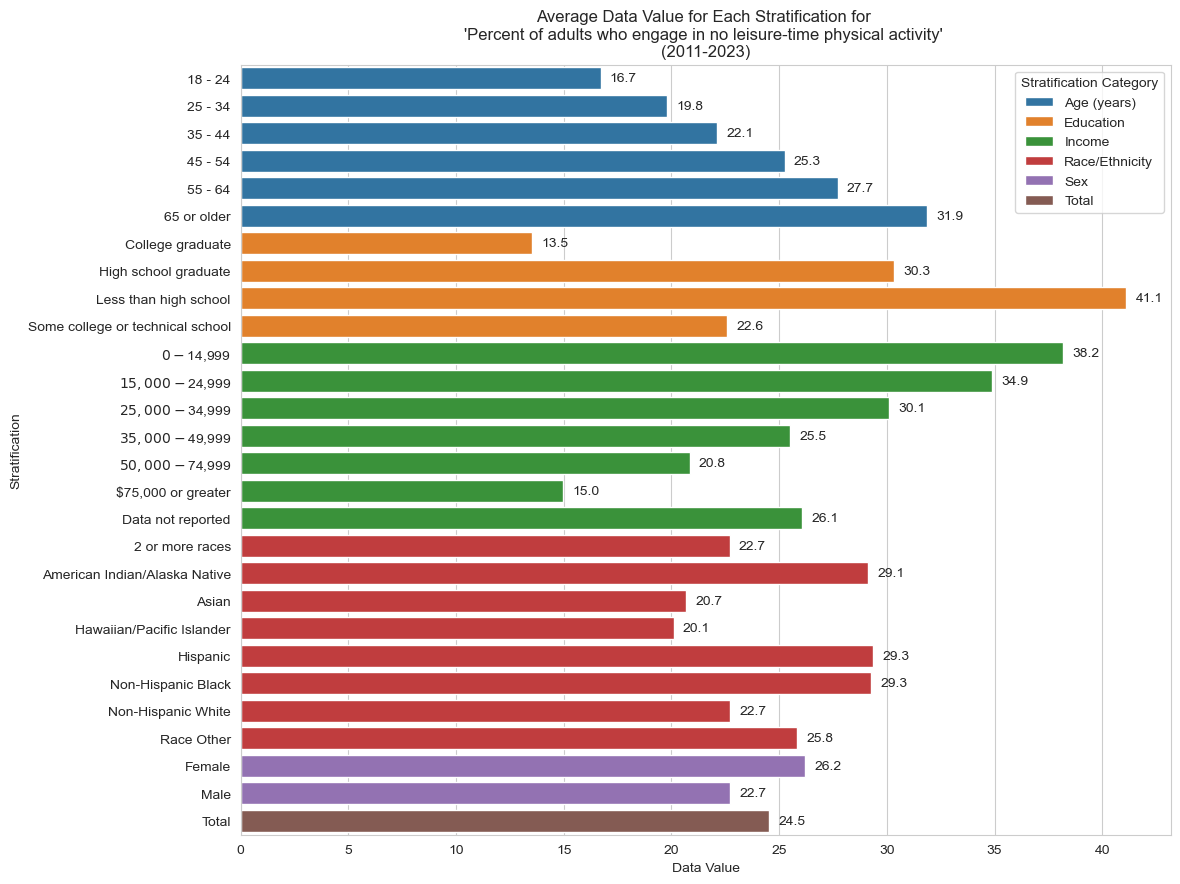

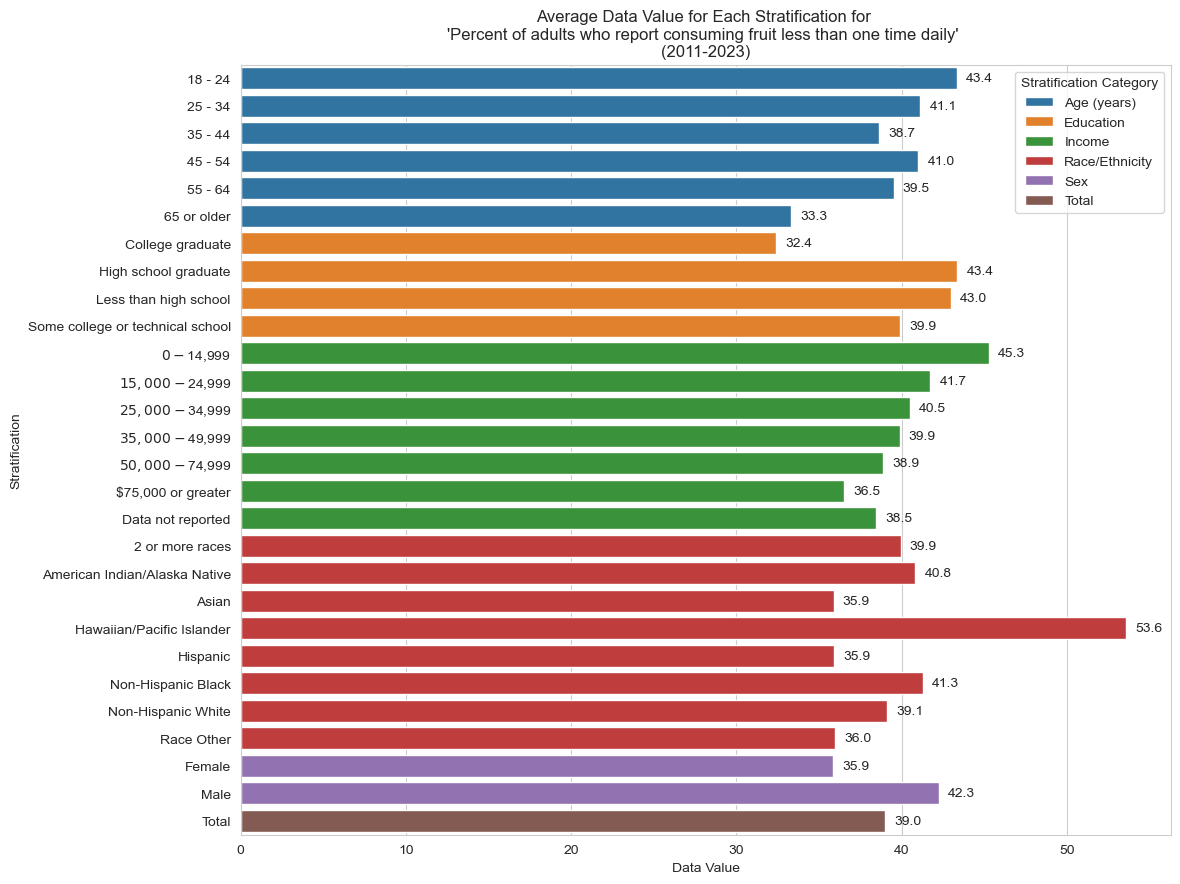

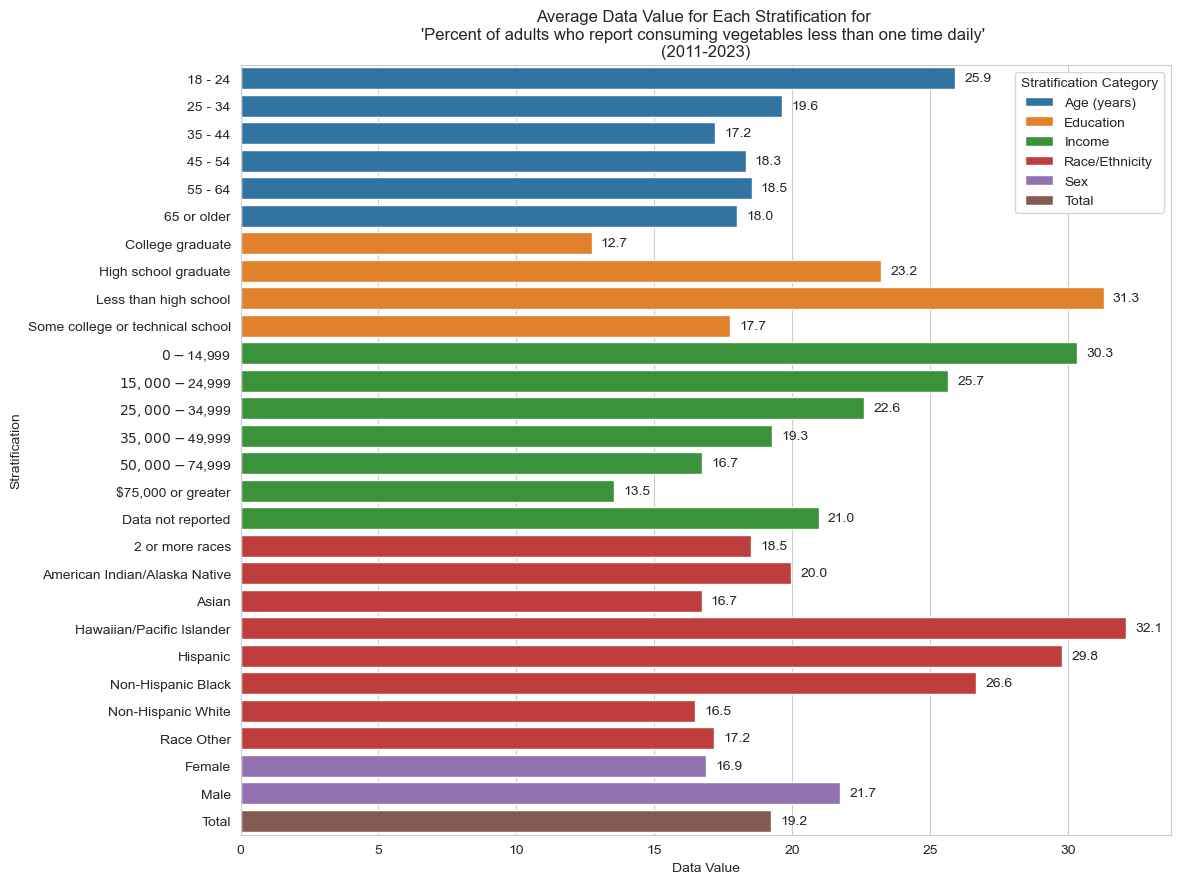

In [20]:
#Loop through each QuestionID and create a graph of average values of the data value for each question

for id, question in questions_with_ID.items():
    subset = grouped_by_questions_and_strat[grouped_by_questions_and_strat["QuestionID"] == id]

    plt.figure(figsize = (12,10))
    ax = sns.barplot(data=subset,
                x="Data_Value",
                y="Stratification1",
                hue="StratificationCategory1")

    max_x = ax.get_xlim()[1]
    offset = 0.01 * max_x  # 1% of axis range

    for patch in ax.patches:
        value = patch.get_width()
        if (value is None) or np.isnan(value) or value <= 0:
            continue  # skip zero/NaN placeholder bars
        y = patch.get_y() + patch.get_height()/2

        if subset["Data_Value"].max() <= 1.0:
            ax.text(value + offset, y, f"{value*100:.1f}%", ha="left", va="center")
            ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
        else:
            ax.text(value + offset, y, f"{value:.1f}", ha="left", va="center")


    plt.title(f"Average Data Value for Each Stratification for \n'{question}' \n(2011-2023)")
    plt.ylabel("Stratification")
    plt.xlabel("Data Value")
    plt.legend(title="Stratification Category")
    plt.show()

In [21]:
#Bar chart of states with the most responses
total_rows_states = main_data[main_data["Stratification1"] == "Total"]
total_rows_grouped_by_states = total_rows_states.groupby("LocationAbbr")["Sample_Size"].mean()
total_rows_grouped_by_states = total_rows_grouped_by_states.to_frame()
total_rows_grouped_by_states = total_rows_grouped_by_states.reset_index()



Text(0.5, 1.0, 'Top 10 Average Total Sample Size by States')

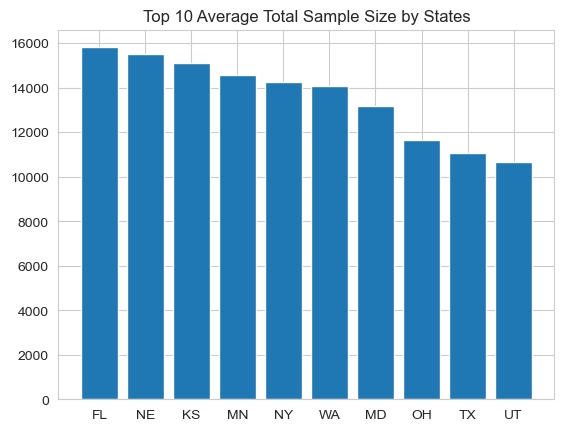

In [22]:
#Find the top 10 largest and then plot with bar graph
top_10_largest_mean_sample_sizes = total_rows_grouped_by_states.nlargest(10, "Sample_Size")

#Graphing
plt.bar(top_10_largest_mean_sample_sizes["LocationAbbr"], top_10_largest_mean_sample_sizes["Sample_Size"])
plt.title("Top 10 Average Total Sample Size by States")

In [23]:
sample_and_data_groupby_states_and_que = main_data.groupby(["QuestionID", "Stratification1", "StratificationCategory1"]).mean(["Data_Value", "Sample_Size"])
sample_and_data_groupedby_states_and_que = sample_and_data_groupby_states_and_que.reset_index()
sample_and_data_groupedby_states_and_que = sample_and_data_groupedby_states_and_que.sort_values(by=["StratificationCategory1", "Stratification1"])
sample_and_data_groupedby_states_and_que = sample_and_data_groupedby_states_and_que[sample_and_data_groupedby_states_and_que["Stratification1"] != "Total"]
type(sample_and_data_groupedby_states_and_que)

pandas.core.frame.DataFrame

In [24]:
#Create list of categories
categories = sample_and_data_groupedby_states_and_que["StratificationCategory1"].unique()
cmap = plt.cm.Set2

#Create list of colors from color map of matplotlib
colors = [cmap(i/len(categories)) for i in range(len(categories))]

#Create dictionary that maps colors to each category
color_map = {}
for i, category in enumerate(categories):
    color_map[category] = colors[i]

#Map so that matplotlib can use it in the graphs
print(color_map)

{'Age (years)': (0.4, 0.7607843137254902, 0.6470588235294118, 1.0), 'Education': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961, 1.0), 'Income': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411, 1.0), 'Race/Ethnicity': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235, 1.0), 'Sex': (0.8980392156862745, 0.7686274509803922, 0.5803921568627451, 1.0)}


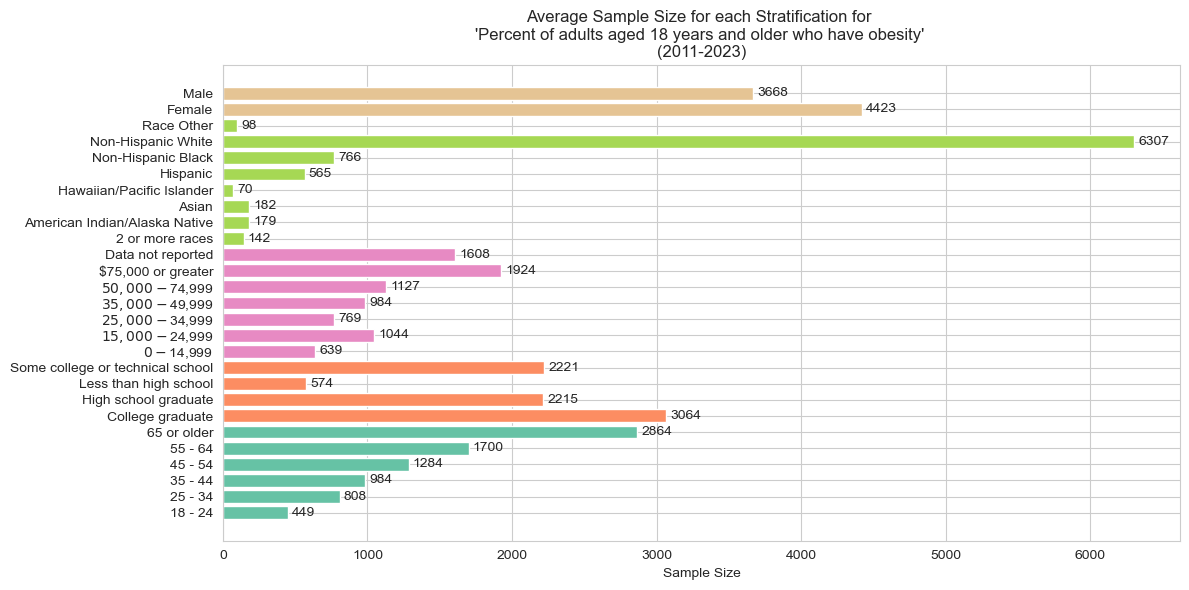

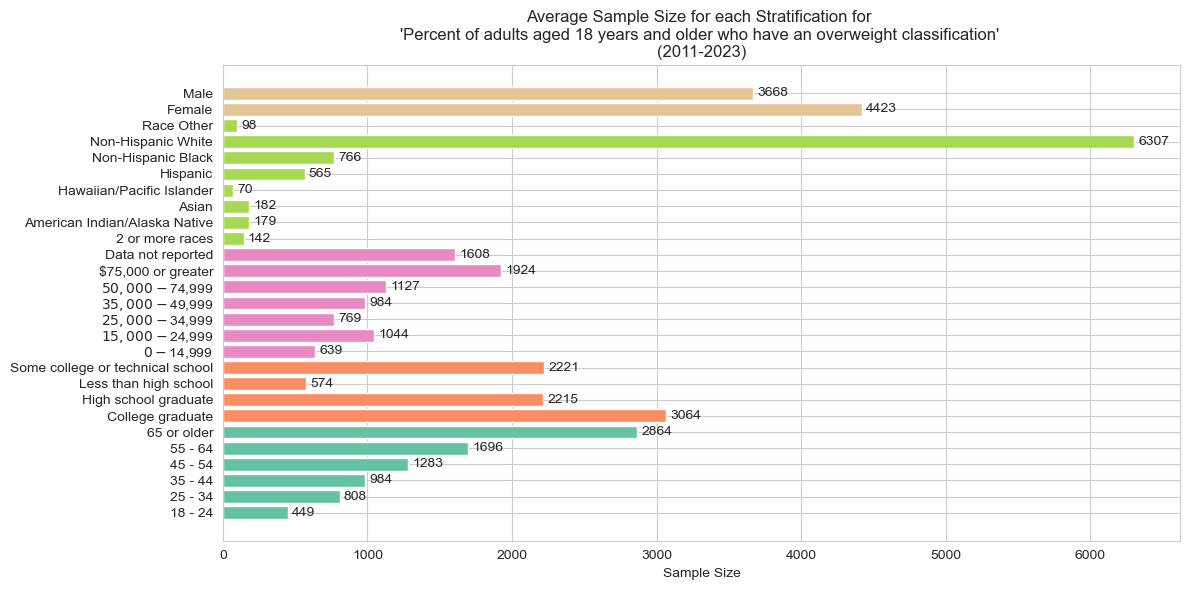

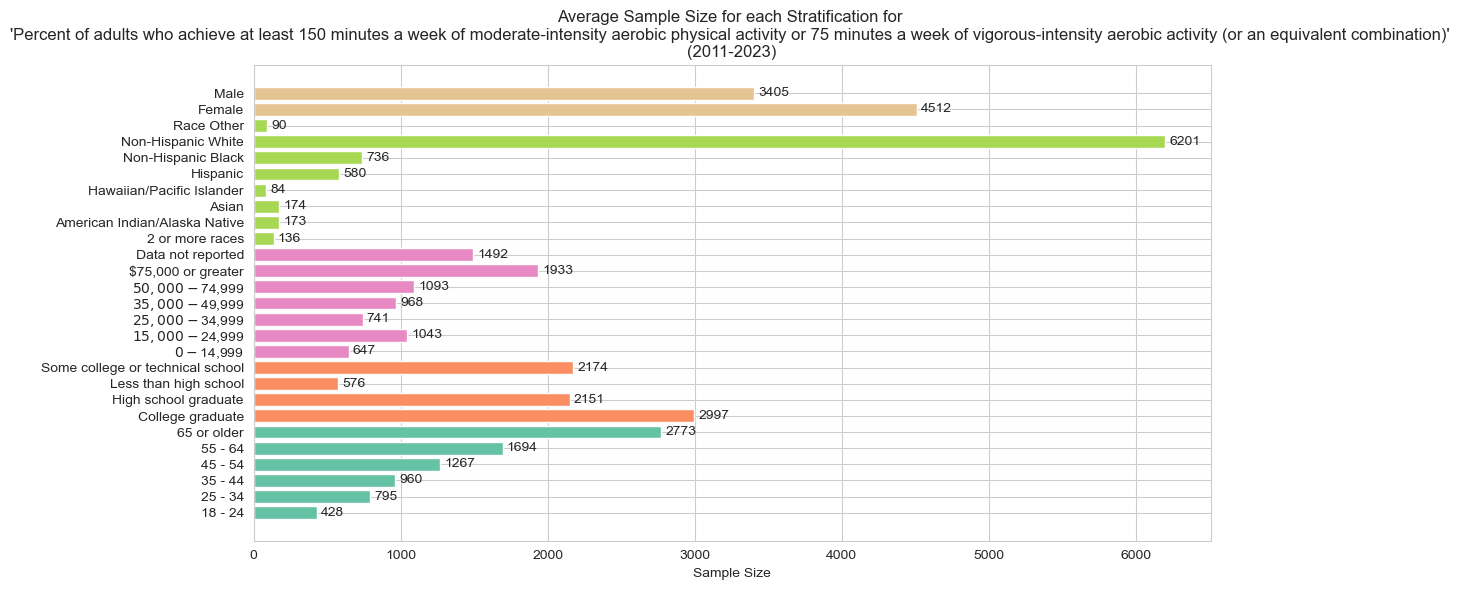

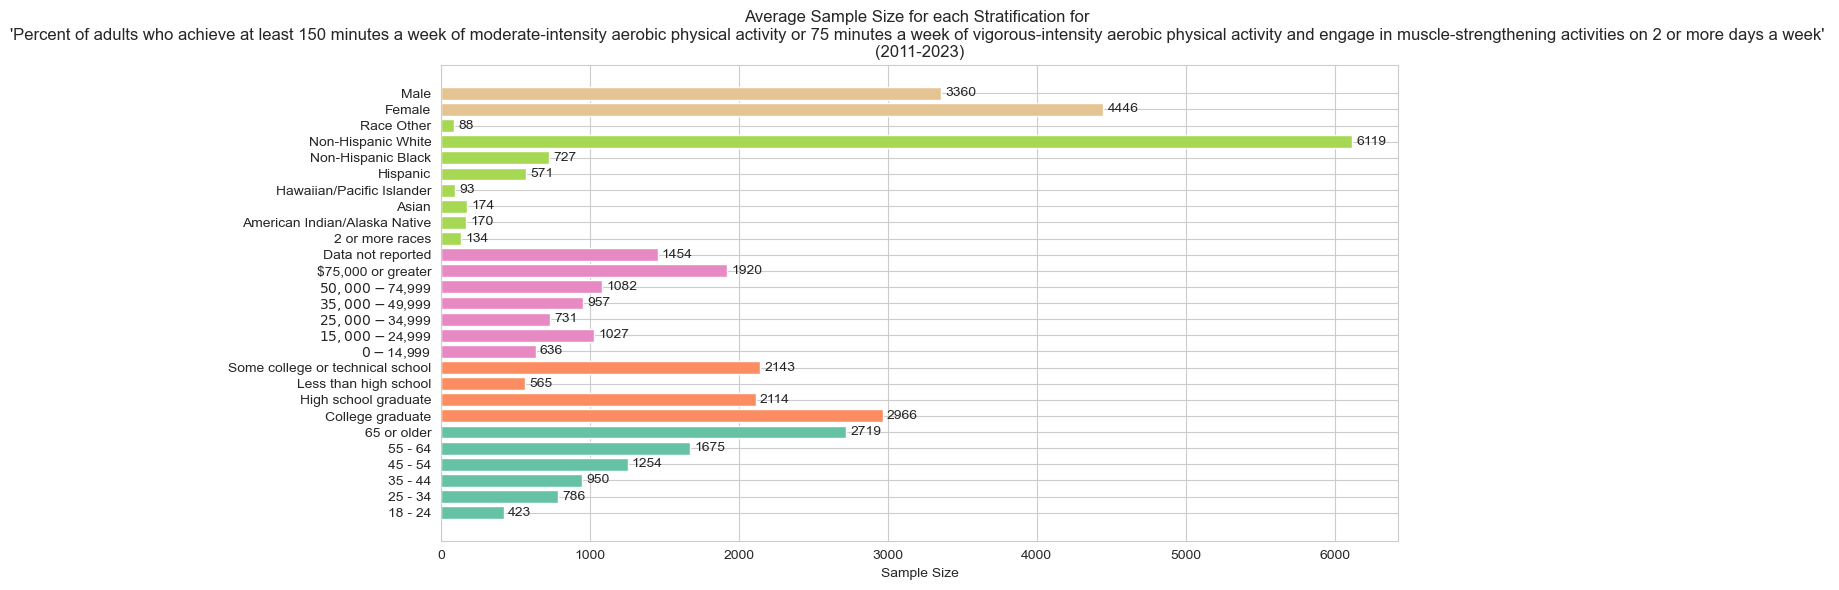

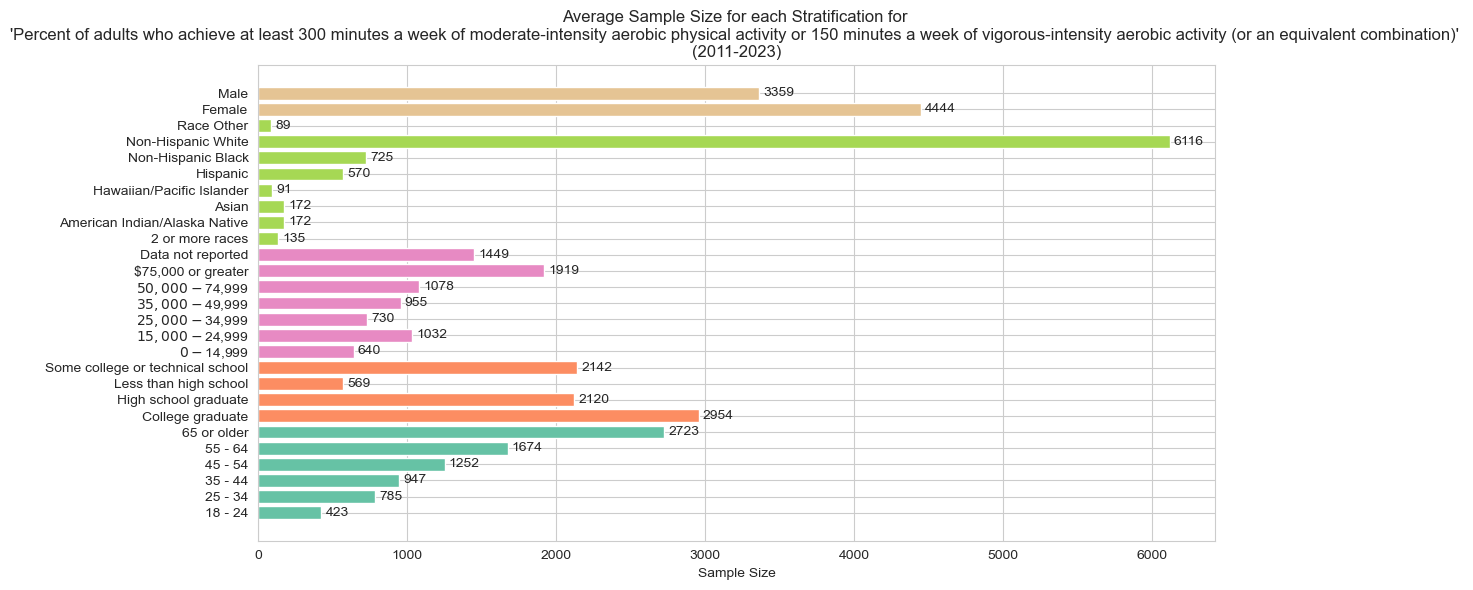

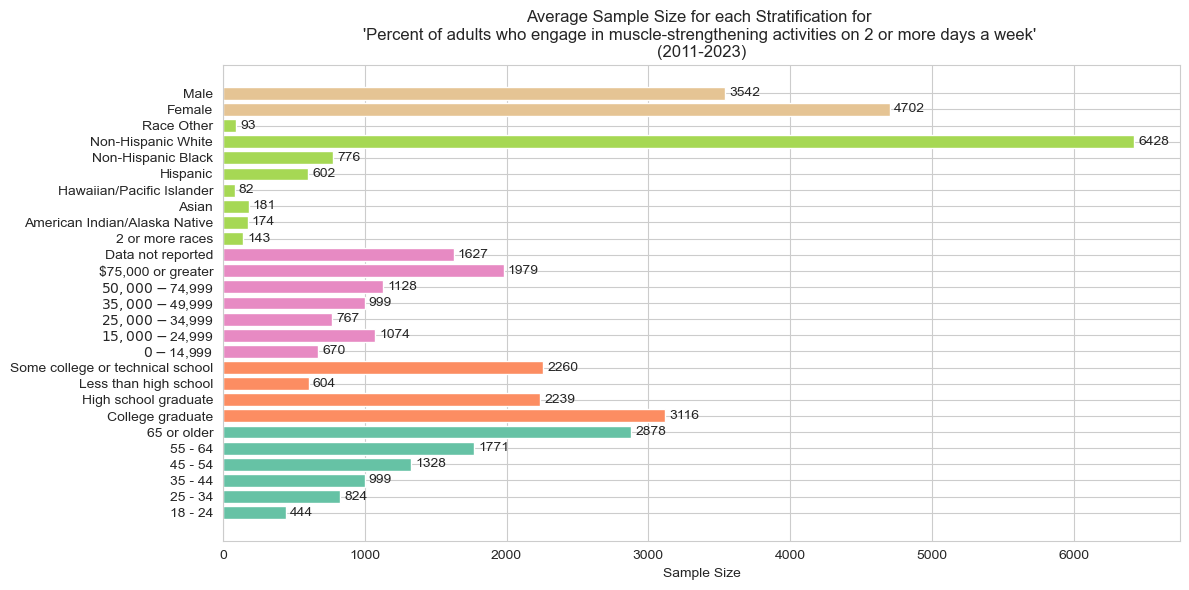

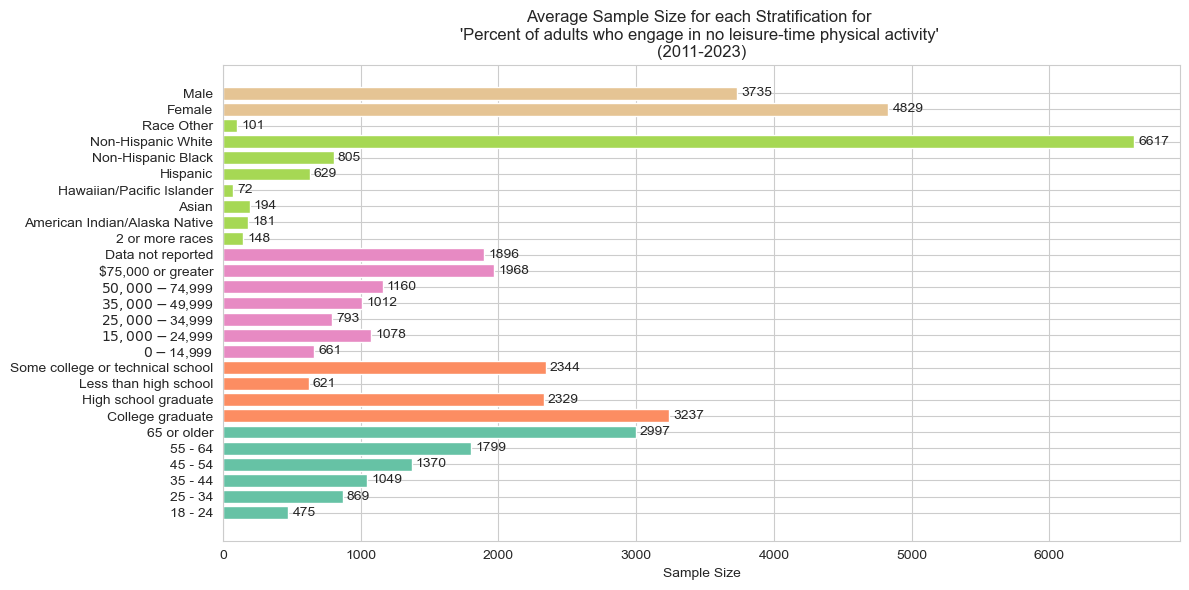

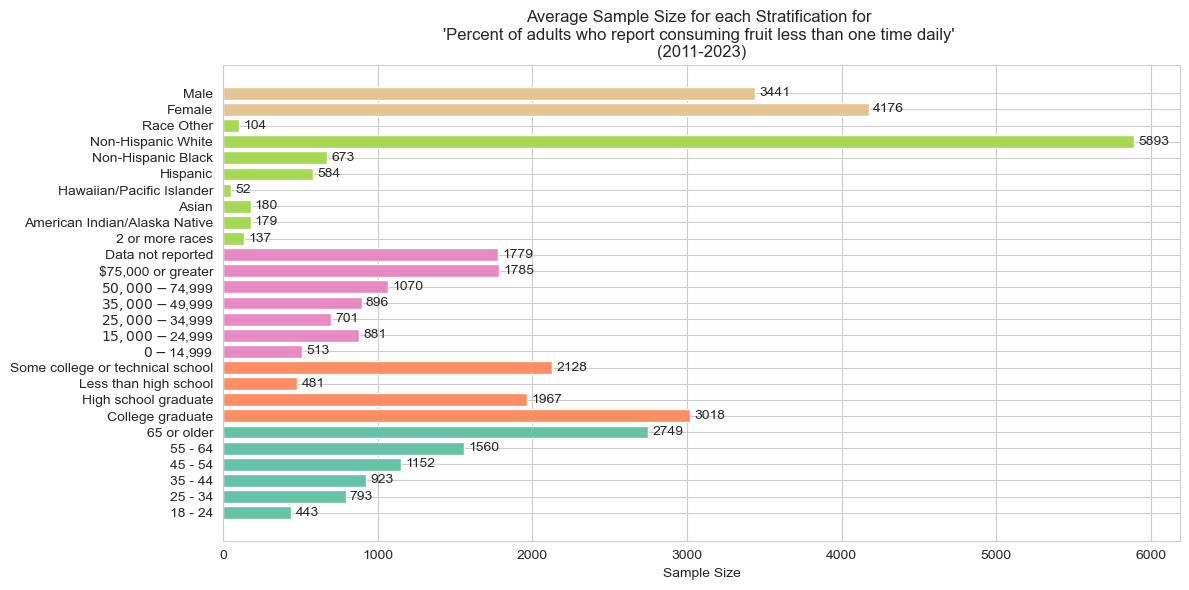

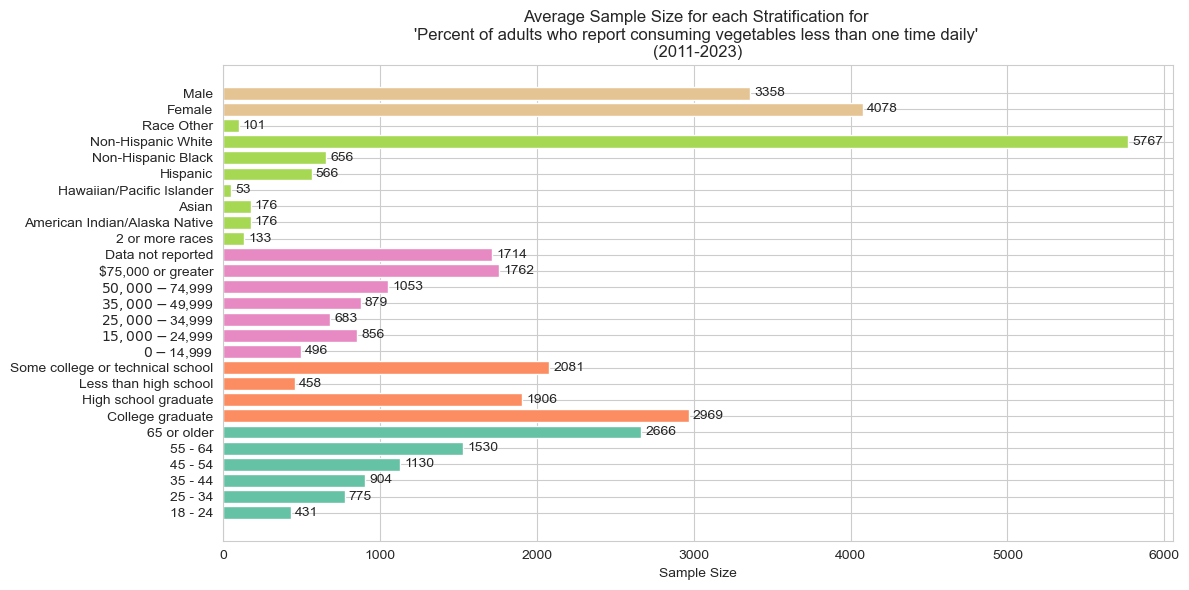

In [25]:
#Avg sample size per question for each strat
#Loop
for id, question in questions_with_ID.items():
    subset = sample_and_data_groupedby_states_and_que[sample_and_data_groupedby_states_and_que["QuestionID"] == id]

    #Map colors to the categories so it can used by matplotlib in the graph
    bar_colors = subset["StratificationCategory1"].map(color_map)

    #Setup graphs and create bars
    fig, ax = plt.subplots(figsize=(12,6))
    bars = ax.barh(subset["Stratification1"], subset["Sample_Size"], color=bar_colors)

    #Bar Labels
    ax.bar_label(bars, fmt="%.0f", padding=3, rotation=0)

    #Set titles and labels
    ax.set_xlabel("Sample Size")
    ax.set_title(f"Average Sample Size for each Stratification for \n'{question}' \n(2011-2023)")
    plt.tight_layout()
    plt.show()

In [26]:
#Graphs Done
#Average sample size and Average data value for each startifcation broken up by question
#Top 10 Average Total Sample Sizes by state
#Average total Sample Size for each question
#Average Data value for each question
#Average sample size for each question
#Bar chart of counts of records by class
#Count of entries per year by class

#Prospective graphs
#Avg data value of obesity across states (Top 10 states with highest obesity rates)
#Avg data value for income, race, and sex
#Bar chart with error bars for the states
#Grouped bar by year compare one question(Obesity) across the years grouped by state or demographic

['Obesity / Weight Status' 'Physical Activity' 'Fruits and Vegetables']


Text(0.5, 1.0, 'Total Count of Records for Each Class')

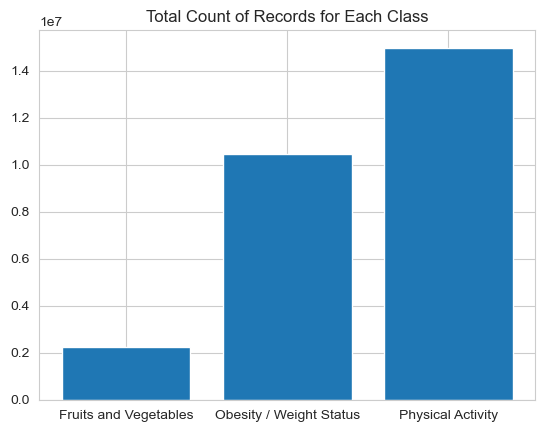

In [27]:
#Bar Chart of counts of records by class

#Print unique class values
class_values = main_data["Class"].unique()
print(class_values)

#groupby data by class
grouped_by_class = total_rows.groupby(["Class"])

#Find mean of sample size grouped by class
mean_totals_by_class = grouped_by_class.sum("Sample_Size")
mean_totals_by_class.head()

#Plot bar chart of
plt.bar(mean_totals_by_class.index, mean_totals_by_class["Sample_Size"])
plt.title("Total Count of Records for Each Class")

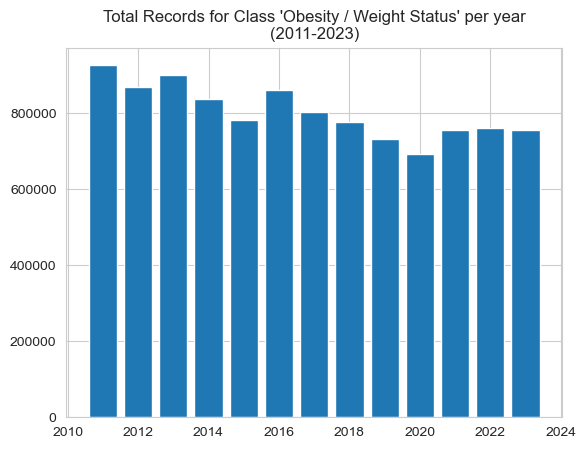

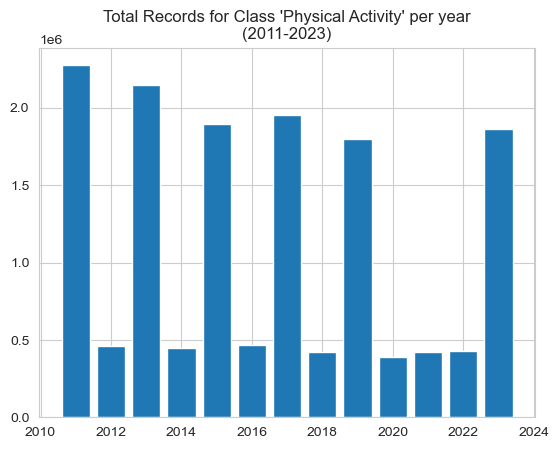

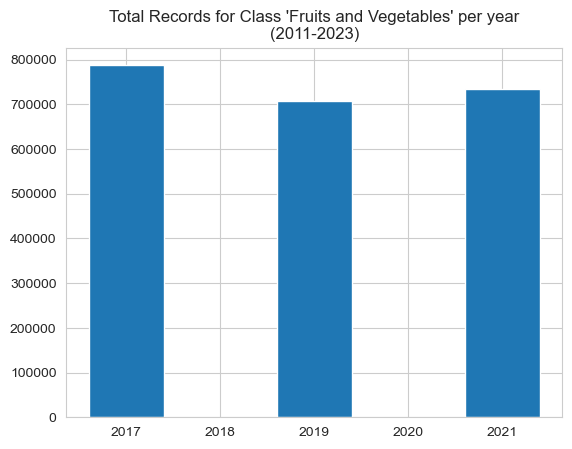

In [28]:
#Count of entries per year to see if there is any change over time

#Group the data by year
total_row_grouped_by_year = total_rows.groupby(["YearStart", "YearEnd", "Class"])
total_sums_per_year = total_row_grouped_by_year.sum("Sample_Size")
total_sums_per_year = total_sums_per_year.reset_index()

#Plot the counts of entries per year by class
for value in class_values:
    subset = total_sums_per_year[total_sums_per_year["Class"] == value]
    plt.bar(subset["YearStart"], subset["Sample_Size"])
    plt.title(f"Total Records for Class '{value}' per year\n(2011-2023)")
    plt.show()

In [29]:
#Average of HCL and LCL by Stratification category

In [30]:
print(main_data["StratificationCategory1"].unique())

['Income' 'Age (years)' 'Race/Ethnicity' 'Education' 'Sex' 'Total']
